In [ ]:
!unzip "/content/archive (4).zip"


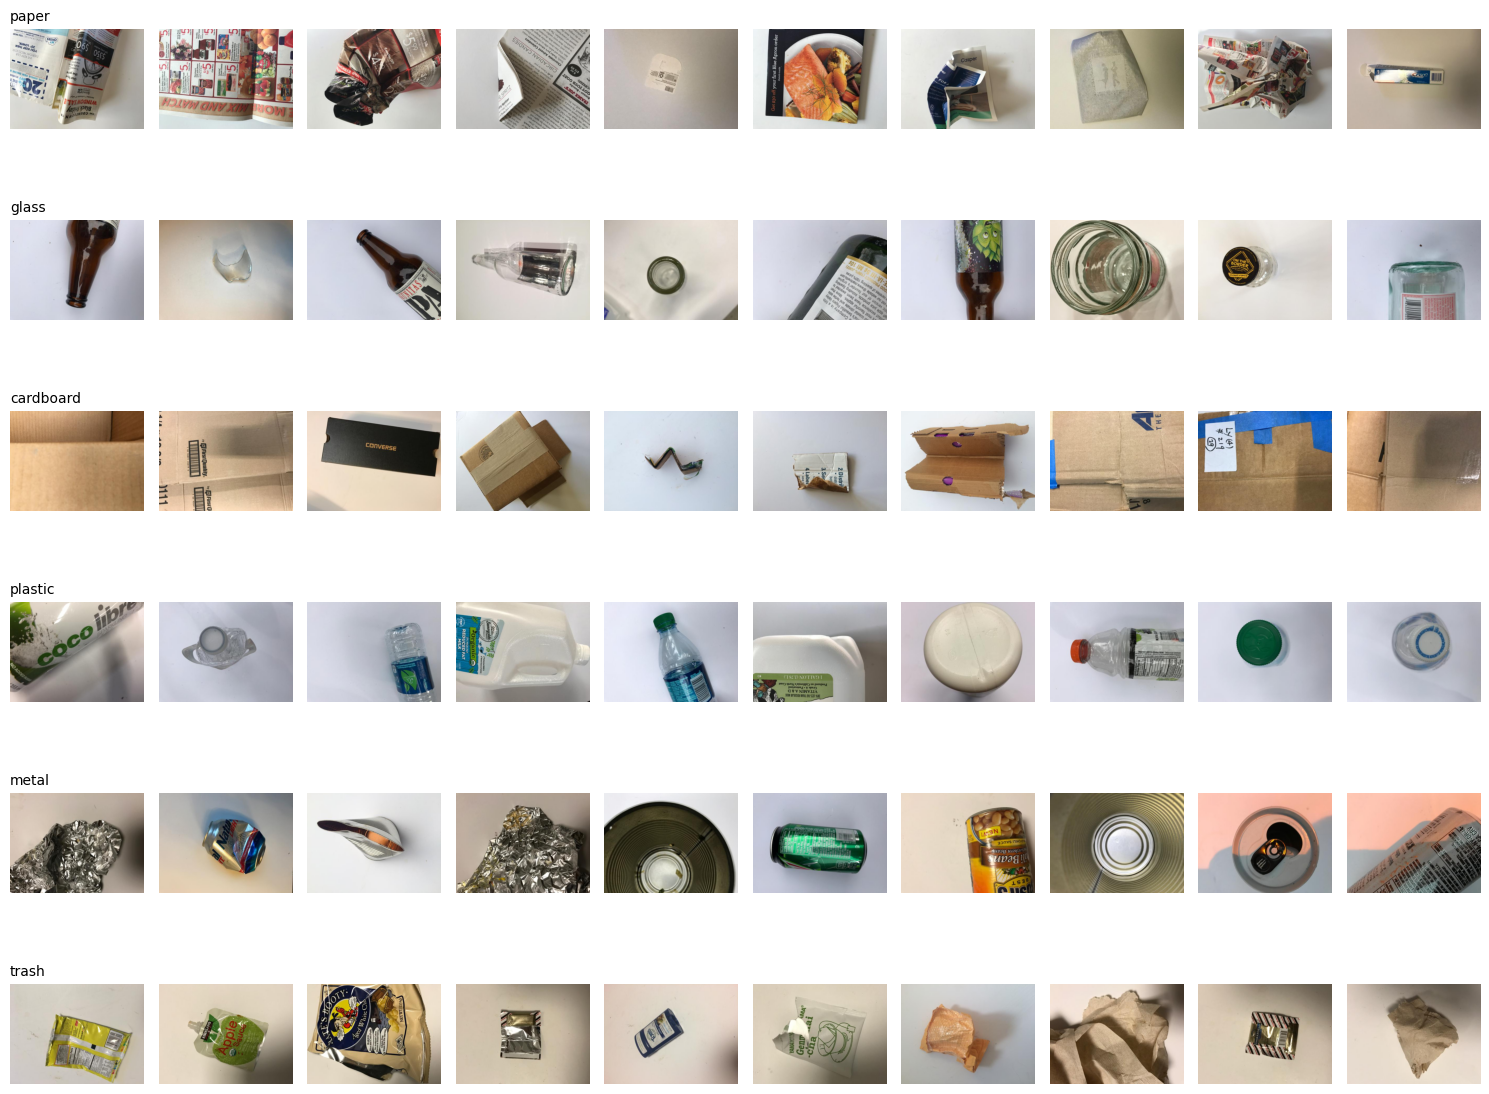

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

# Path to the dataset
dataset_path = "/content/Trashnet"

# Get class folders
class_folders = [os.path.join(dataset_path, d) for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Display settings
fig, axs = plt.subplots(len(class_folders), 10, figsize=(15, 2 * len(class_folders)))

# Loop over classes
for row_idx, class_folder in enumerate(class_folders):
    image_files = glob(os.path.join(class_folder, "*.jpg"))[:10]  # Show first 10 images per class

    for col_idx, image_file in enumerate(image_files):
        img = mpimg.imread(image_file)
        axs[row_idx, col_idx].imshow(img)
        axs[row_idx, col_idx].axis('off')
        if col_idx == 0:
            axs[row_idx, col_idx].set_title(os.path.basename(class_folder), fontsize=10, loc='left')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set dataset path
dataset_path = '/content/Trashnet'  # Make sure this path is correct
img_size = 224
batch_size = 32


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2).flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
import tensorflow as tf


base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # Freeze base model


model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:

history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 57s 592ms/step - accuracy: 0.5077 - loss: 1.3112 - val_accuracy: 0.7296 - val_loss: 0.7162
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 463ms/step - accuracy: 0.7504 - loss: 0.6346 - val_accuracy: 0.7594 - val_loss: 0.6122
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 447ms/step - accuracy: 0.7889 - loss: 0.5632 - val_accuracy: 0.7654 - val_loss: 0.6441
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 472ms/step - accuracy: 0.8338 - loss: 0.4459 - val_accuracy: 0.7614 - val_loss: 0.6823
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 461ms/step - accuracy: 0.8467 - loss: 0.4307 - val_accuracy: 0.7495 - val_loss: 0.6574
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 443ms/step - accuracy: 0.8573 - loss: 0.3807 - val_accuracy: 0.7634 - val_loss: 0.6567
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 418ms/step - accuracy: 0.8792 - loss: 0.3265 - val_accuracy: 0.7634 - val_loss: 0.7052
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 428ms/step - accuracy: 0.8833 - loss: 0.3085 - val_accu

In [ ]:
loss, acc = model.evaluate(val_generator)
print(f"Final Validation Accuracy: {acc:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8146 - loss: 0.5641
Final Validation Accuracy: 0.80


In [ ]:
model.save("final_mobilenetv2_model.h5")


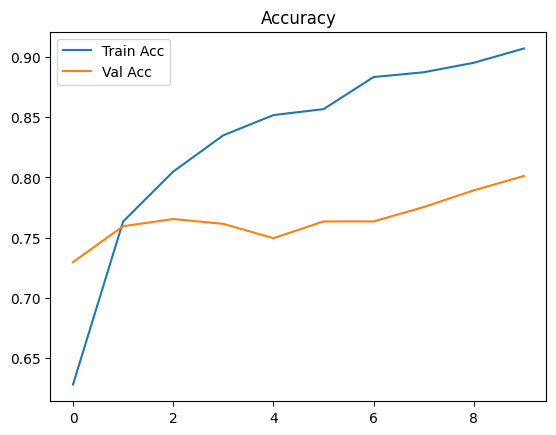

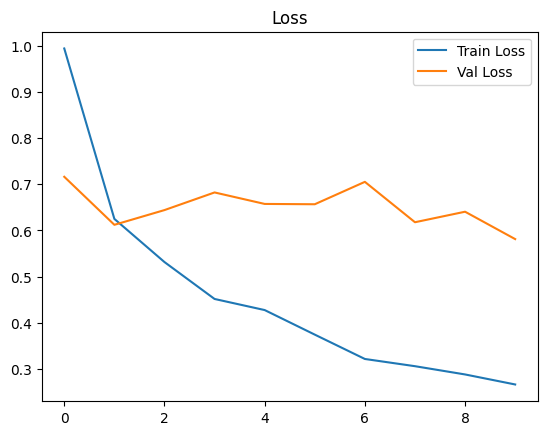

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [40]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the model
model = tf.keras.models.load_model("final_mobilenetv2_model.h5")

# Class labels (adjust if needed based on your dataset)
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Preprocessing function
def predict_image(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)[0]
    predicted_index = np.argmax(predictions)
    confidence = predictions[predicted_index]

    return {class_names[i]: float(predictions[i]) for i in range(6)}

# Gradio Interface
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="Trash Classifier",
    description="Upload an image of trash (plastic, metal, glass, paper, cardboard, or trash) to classify it."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a6ab6baeab82aa1987.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
